 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
cd resources

/Users/troycassels/USYD-VIRT-FIN-PT-12-2022-U-LOLC/04-Pandas/Homework/Instructions/Starter_Code/Resources


# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns

input_file_1 = ("../Resources/whale_returns.csv")

whale_data = pd.read_csv(input_file_1)
whale_data = whale_data.astype({"Date":"datetime64"})
whale_data = whale_data.set_index('Date')
whale_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls

whale_data.isnull().count()

SOROS FUND MANAGEMENT LLC      1060
PAULSON & CO.INC.              1060
TIGER GLOBAL MANAGEMENT LLC    1060
BERKSHIRE HATHAWAY INC         1060
dtype: int64

In [5]:
# Drop nulls

whale_data = whale_data.dropna()


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns

input_file_2 = ("../Resources/algo_returns.csv")

algo_data = pd.read_csv(input_file_2)
algo_data = algo_data.astype({"Date":"datetime64"})
algo_data = algo_data.set_index('Date')

In [7]:
# Count nulls

algo_data.isnull().count()

Algo 1    1241
Algo 2    1241
dtype: int64

In [8]:
# Drop nulls

algo_data = algo_data.dropna()

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P 500 Closing Prices

input_file_3 = ("../Resources/sp500_history.csv")

sp500_data = pd.read_csv(input_file_3)


In [10]:
# Check Data Types

sp500_data.dtypes

Date     object
Close    object
dtype: object

In [11]:
sp500_data.head()

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06


In [12]:
# Fix Data Types

sp500_data["Close"] = sp500_data["Close"].str.replace("$", "")
sp500_data = sp500_data.astype({"Date":"datetime64","Close":"float"})
sp500_data.dtypes


/Users/troycassels/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


Date     datetime64[ns]
Close           float64
dtype: object

In [13]:
# Calculate Daily Returns

sp500_data = sp500_data.set_index('Date')
daily_return_sp500 = sp500_data["Close"].pct_change()
daily_return_sp500

Date
2019-04-23         NaN
2019-04-22   -0.008764
2019-04-18   -0.001011
2019-04-17   -0.001577
2019-04-16    0.002279
                ...   
2012-10-05    0.003469
2012-10-04    0.000322
2012-10-03   -0.007123
2012-10-02   -0.003611
2012-10-01   -0.000872
Name: Close, Length: 1649, dtype: float64

In [14]:
# Drop nulls

daily_return_sp500 = daily_return_sp500.dropna()
daily_return_sp500

Date
2019-04-22   -0.008764
2019-04-18   -0.001011
2019-04-17   -0.001577
2019-04-16    0.002279
2019-04-15   -0.000509
                ...   
2012-10-05    0.003469
2012-10-04    0.000322
2012-10-03   -0.007123
2012-10-02   -0.003611
2012-10-01   -0.000872
Name: Close, Length: 1648, dtype: float64

In [15]:
# Rename `Close` Column to be specific to this portfolio.

daily_return_sp500.columns = ["SP500"]


## Combine Whale, Algorithmic, and S&P 500 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.

combined_data = pd.concat([whale_data, algo_data, daily_return_sp500], axis = "columns", join = "inner")
combined_data = combined_data.sort_index()
combined_data


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

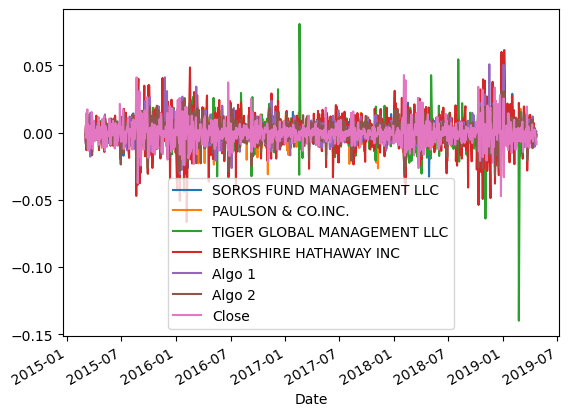

In [17]:
# Plot daily returns of all portfolios

daily_returns_combined = combined_data.dropna()
daily_returns_combined.plot()

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

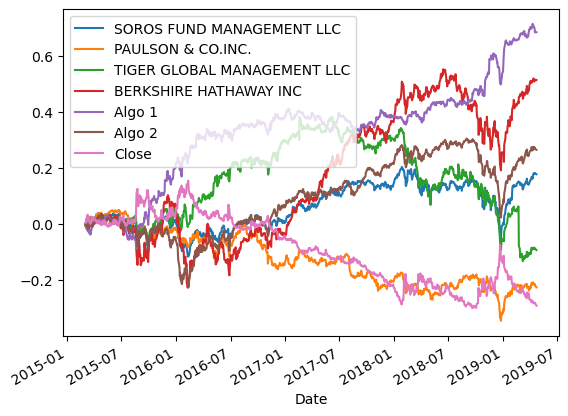

In [18]:
# Calculate cumulative returns of all portfolios

cumulative = daily_returns_combined.cumsum()
cumulative

# Plot cumulative returns

cumulative.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

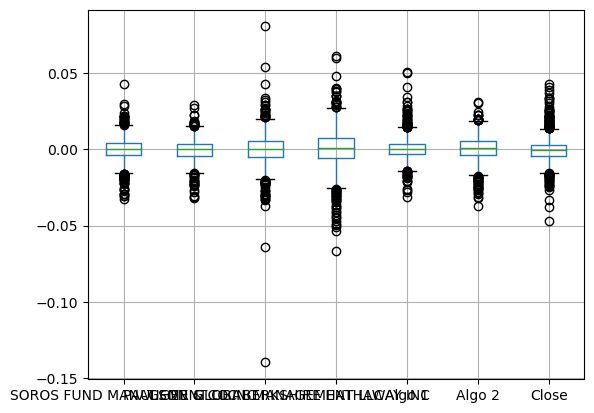

In [19]:
# Box plot to visually show risk

daily_returns_combined.boxplot()

### Calculate Standard Deviations

In [20]:
# Calculate the daily standard deviations of all portfolios

daily_returns_combined.std()

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
Close                          0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [21]:
# Calculate  the daily standard deviation of S&P 500

daily_returns_combined["Close"].std()

# Determine which portfolios are riskier than the S&P 500

# TIGER GLOBAL MANAGEMENT LLC & BERKSHIRE HATHAWAY INC

0.00858688974707399

### Calculate the Annualized Standard Deviation

In [22]:
# Calculate the annualized standard deviation (252 trading days)

daily_returns_combined.std() * 252

SOROS FUND MANAGEMENT LLC      1.989840
PAULSON & CO.INC.              1.770430
TIGER GLOBAL MANAGEMENT LLC    2.746121
BERKSHIRE HATHAWAY INC         3.255526
Algo 1                         1.920918
Algo 2                         2.101991
Close                          2.163896
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

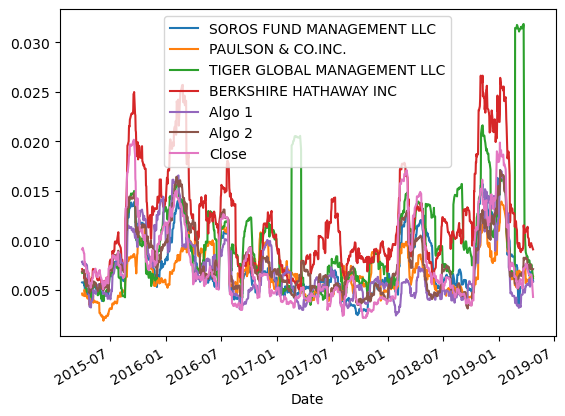

In [23]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

rolling_21 = daily_returns_combined.rolling(window=21).std()
rolling_21

# Plot the rolling standard deviation

rolling_21.plot()

### Calculate and plot the correlation

In [24]:
# Calculate the correlation

correlation = daily_returns_combined.corr()

# Display de correlation matrix
correlation


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
Close,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Beta'}, xlabel='Date'>

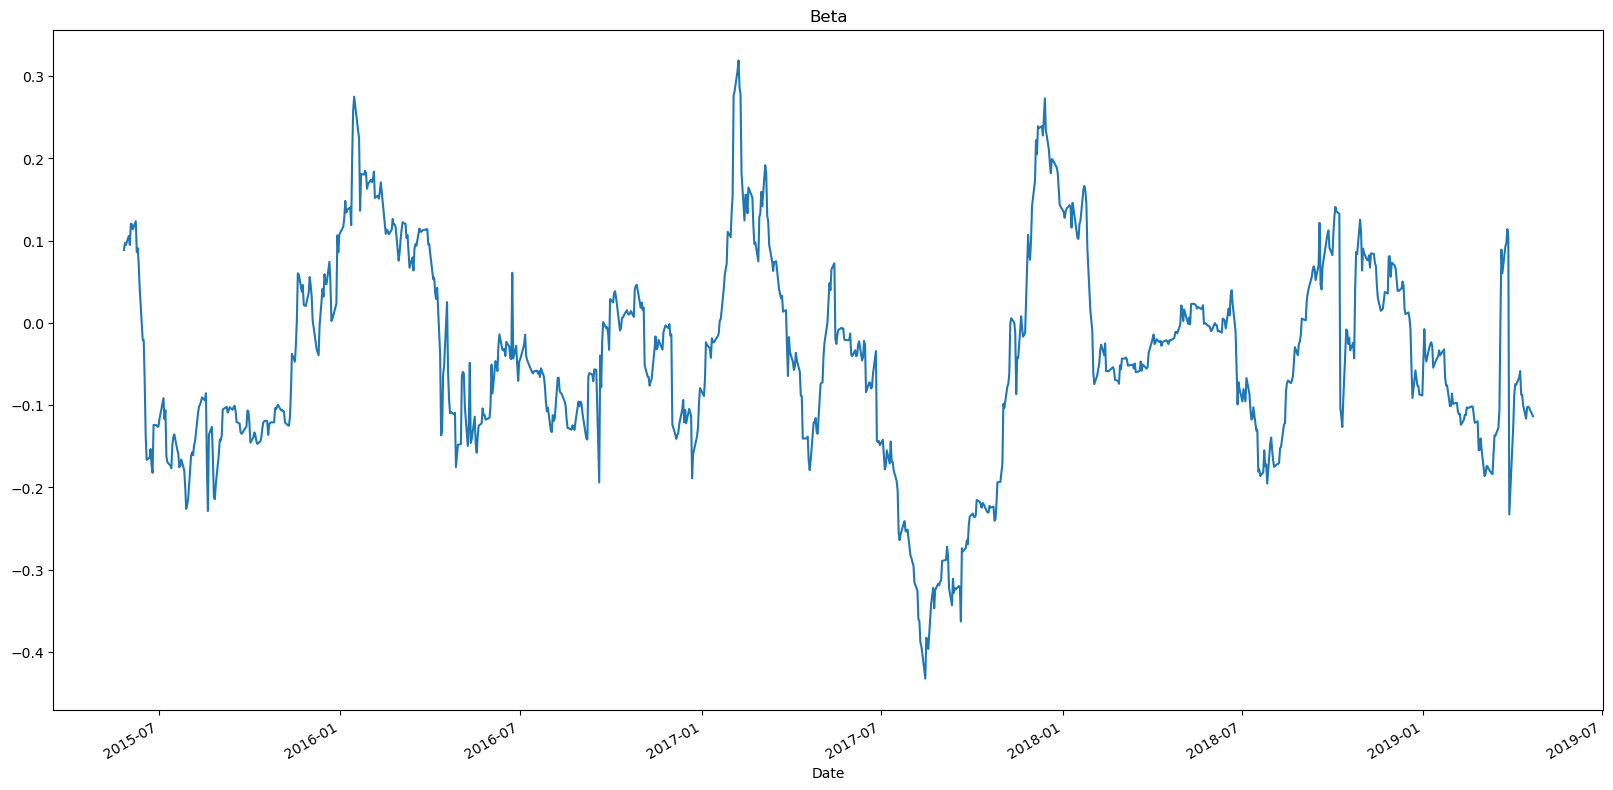

In [25]:
# Calculate covariance of a single portfolio

algo1_covariance = combined_data["Algo 1"].rolling(window=60).cov(combined_data["Close"])

# Calculate variance of S&P 500

variance = daily_returns_combined["Close"].rolling(window=60).var()
variance

# Computing beta

beta = algo1_covariance / variance
beta

# Plot beta trend

beta.plot(figsize=(20,10),title="Beta")


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [26]:
# Use `ewm` to calculate the rolling window

ewm_21day = daily_returns_combined.ewm(span=21, adjust=False).mean()
ewm_21day

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,-0.000948,-0.004233,-0.000681,-0.005589,-0.002546,-0.000644,0.003899
2015-03-05,-0.000496,-0.003478,-0.000405,-0.004469,-0.002402,-0.000192,0.004851
2015-03-06,-0.001170,-0.003486,-0.001139,-0.005253,-0.002634,-0.001216,0.004053
2015-03-09,-0.001011,-0.002785,-0.000504,-0.004926,-0.002890,-0.000987,0.005253
...,...,...,...,...,...,...,...
2019-04-15,0.001953,0.000529,0.000877,0.001321,0.000708,0.001108,-0.001515
2019-04-16,0.002021,0.000516,0.000721,0.001277,0.000012,0.001271,-0.001170
2019-04-17,0.001574,-0.000119,0.000255,0.001454,-0.000926,0.000680,-0.001207


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [27]:
# Annualized Sharpe Ratios

sharpe_ratios = ((daily_returns_combined.mean()-daily_returns_combined['Close'].mean()) * 252) / (daily_returns_combined.std() * np.sqrt(252))
sharpe_ratios


SOROS FUND MANAGEMENT LLC      0.906838
PAULSON & CO.INC.              0.142411
TIGER GLOBAL MANAGEMENT LLC    0.278448
BERKSHIRE HATHAWAY INC         0.951436
Algo 1                         1.953767
Algo 2                         1.018189
Close                          0.000000
dtype: float64

<AxesSubplot:>

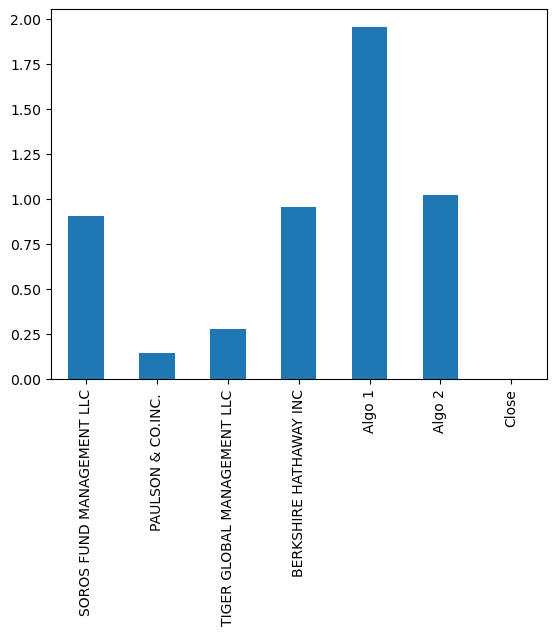

In [28]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios.plot(kind="bar")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

In [29]:
# Yes algorithmic strategies outperform the market and whales portfolios.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [30]:
# Reading data from 1st stock

input_file_4 = ("../Resources/aapl_historical.csv")

aapl_data = pd.read_csv(input_file_4)
aapl_data = aapl_data.astype({"Trade DATE":"datetime64"})
aapl_data = aapl_data.set_index("Trade DATE")

In [31]:
# Reading data from 2nd stock

input_file_5 = ("../Resources/cost_historical.csv")

cost_data = pd.read_csv(input_file_5)
cost_data = cost_data.astype({"Trade DATE":"datetime64"})
cost_data = cost_data.set_index("Trade DATE")

In [32]:
# Reading data from 3rd stock

input_file_5 = ("../Resources/goog_historical.csv")

goog_data = pd.read_csv(input_file_5)
goog_data = goog_data.astype({"Trade DATE":"datetime64"})
goog_data = goog_data.set_index("Trade DATE")

In [33]:
# Combine all stocks in a single DataFrame

combined_portfolio = pd.concat([aapl_data, cost_data, goog_data], axis="columns", join="inner")
combined_portfolio

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2019-05-09,AAPL,200.72,COST,243.47,GOOG,1162.38
2019-05-08,AAPL,202.90,COST,241.34,GOOG,1166.27
2019-05-07,AAPL,202.86,COST,240.18,GOOG,1174.10
2019-05-06,AAPL,208.48,COST,244.23,GOOG,1189.39
2019-05-03,AAPL,211.75,COST,244.62,GOOG,1185.40
...,...,...,...,...,...,...
2018-05-17,AAPL,186.99,COST,199.60,GOOG,1078.59
2018-05-16,AAPL,188.18,COST,198.71,GOOG,1081.77
2018-05-15,AAPL,186.44,COST,195.48,GOOG,1079.23


In [34]:
# Reset Date index

combined_portfolio = combined_portfolio.sort_index()

In [35]:
# Reorganize portfolio data by having a column per symbol

combined_portfolio = combined_portfolio.drop("Symbol", axis=1)
combined_portfolio

,NOCP,NOCP,NOCP
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59
...,...,...,...
2019-05-03,211.75,244.62,1185.40
2019-05-06,208.48,244.23,1189.39
2019-05-07,202.86,240.18,1174.10


In [36]:
combined_portfolio.columns = ["AAPL","COST","GOOG"]
combined_portfolio

,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59
...,...,...,...
2019-05-03,211.75,244.62,1185.40
2019-05-06,208.48,244.23,1189.39
2019-05-07,202.86,240.18,1174.10


In [37]:
# Calculate daily returns

daily_returns = combined_portfolio.pct_change()
daily_returns

# Drop NAs

daily_returns = daily_returns.dropna()


# Display sample data

daily_returns.head()

,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [38]:
# Set weights
weights = [1/3, 1/3, 1/3]

AAPL_weight = 1/3
COST_weight = 1/3
GOOG_weight = 1/3

# Calculate portfolio return

portfolio_returns = AAPL_weight * daily_returns["AAPL"] + COST_weight * daily_returns["COST"] + GOOG_weight * daily_returns["GOOG"]


# Display sample data

portfolio_returns.head()


Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [39]:
# Join your returns DataFrame to the original returns DataFrame

combined_portfolio_updated = pd.concat([daily_returns, portfolio_returns], axis="columns", join="inner")
combined_portfolio_updated.head()

,AAPL,COST,GOOG,0
Trade DATE,,,,
2018-05-14,-0.002333,0.000613,0.001766,0.000015
2018-05-15,-0.009088,-0.002042,-0.019060,-0.010064
2018-05-16,0.009333,0.016523,0.002354,0.009403
2018-05-17,-0.006324,0.004479,-0.002940,-0.001595
2018-05-18,-0.003637,-0.003206,-0.011339,-0.006061


In [40]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

combined_portfolio_updated = combined_portfolio_updated.dropna()
combined_portfolio_updated.head()

,AAPL,COST,GOOG,0
Trade DATE,,,,
2018-05-14,-0.002333,0.000613,0.001766,0.000015
2018-05-15,-0.009088,-0.002042,-0.019060,-0.010064
2018-05-16,0.009333,0.016523,0.002354,0.009403
2018-05-17,-0.006324,0.004479,-0.002940,-0.001595
2018-05-18,-0.003637,-0.003206,-0.011339,-0.006061


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [41]:
# Calculate the annualized `std`

combined_portfolio_updated.std() * np.sqrt(252) 

AAPL    0.296955
COST    0.209320
GOOG    0.263554
0       0.210262
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Trade DATE'>

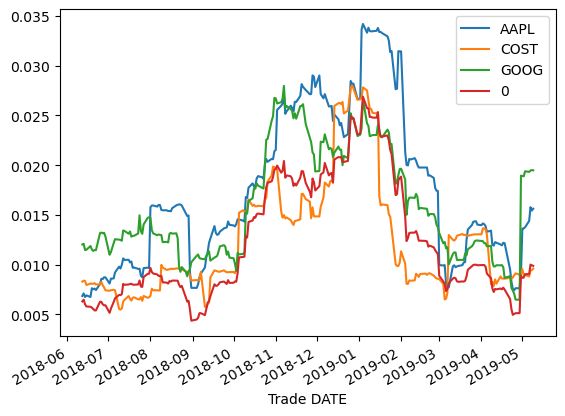

In [42]:
# Calculate rolling standard deviation

rolling_21_combined = combined_portfolio_updated.rolling(window=21).std()

# Plot rolling standard deviation
rolling_21_combined.plot()

### Calculate and plot the correlation

In [43]:
# Calculate and plot the correlation

rolling_21_combined.corr()

,AAPL,COST,GOOG,0
AAPL,1.000000,0.727557,0.852192,0.948615
COST,0.727557,1.000000,0.709679,0.857972
GOOG,0.852192,0.709679,1.000000,0.910534
0,0.948615,0.857972,0.910534,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:xlabel='Trade DATE'>

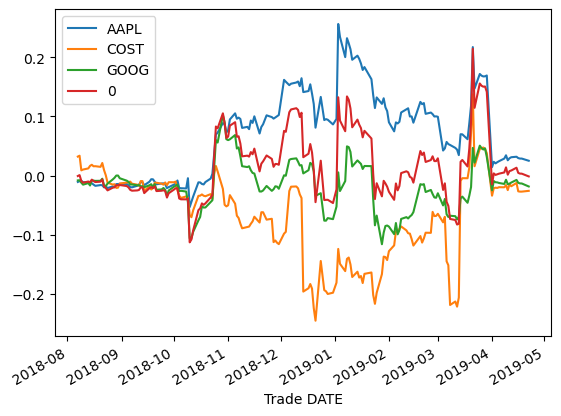

In [44]:
# Calculate and plot Beta


covariance = combined_portfolio_updated.rolling(window=60).cov(daily_return_sp500)

variance = combined_portfolio_updated.var()

beta = covariance / variance
beta.plot()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [45]:
# Calculate Annualized Sharpe Ratios

sharpe_ratios = (combined_portfolio_updated.mean() * 252) / (combined_portfolio_updated.std() * np.sqrt(252))
sharpe_ratios

AAPL    0.361306
COST    1.160482
GOOG    0.349657
0       0.701280
dtype: float64

<AxesSubplot:>

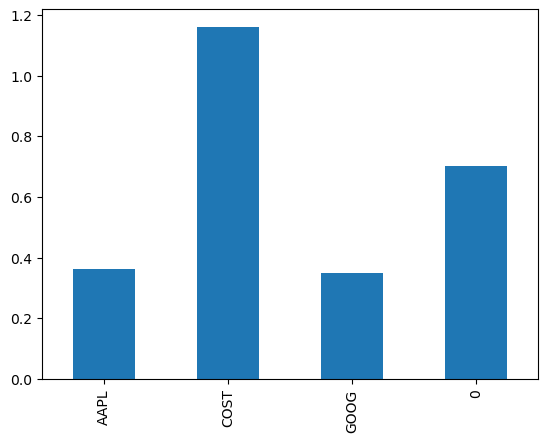

In [46]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios.plot(kind="bar")

### How does your portfolio do?

Write your answer here!

In [47]:
# Portfolio performed poorly as Sharpe ratio of 0.7 is below 1.0.